In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('drive/My Drive/Adult')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics,model_selection,preprocessing,tree,ensemble

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv('ml_train.csv')
test=pd.read_csv('ml_test.csv')
sub=pd.read_csv('ml_sub.csv')

In [5]:
train.shape,test.shape

((73147, 16), (31349, 15))

In [6]:
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [7]:
train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [8]:
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [9]:
train['trainee_engagement_rating'].value_counts()

1.0    25595
2.0    17234
4.0    13113
3.0    11553
5.0     5575
Name: trainee_engagement_rating, dtype: int64

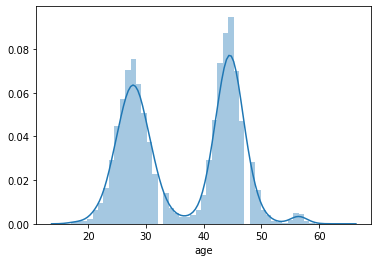

In [10]:
sns.distplot(train['age'].dropna())

In [11]:
train['is_pass'].value_counts(normalize=True)

1    0.695408
0    0.304592
Name: is_pass, dtype: float64

In [12]:
train['is_handicapped'].value_counts()

N    66577
Y     6570
Name: is_handicapped, dtype: int64

Univariate Analysis

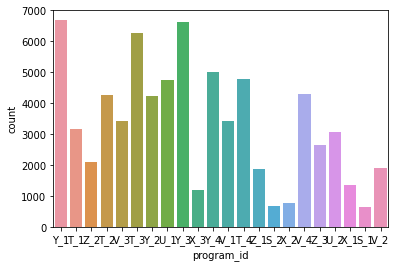

In [13]:
sns.countplot(train['program_id'])

In [14]:
train['program_id'].nunique()

22

In [15]:
train['program_type'].value_counts()

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64

In [16]:
train['program_duration'].value_counts()

134    13027
120    11130
136     9765
121     7679
122     7374
135     7267
131     6571
117     4266
133     3409
130     2659
Name: program_duration, dtype: int64

In [17]:
train['program_duration'].nunique()

10

In [18]:
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [19]:
train['test_id'].nunique()

188

In [20]:
test['test_id'].nunique()

188

In [21]:
train['test_type'].value_counts()

offline    43543
online     29604
Name: test_type, dtype: int64

In [22]:
train['difficulty_level'].value_counts()

easy            40101
intermediate    20668
hard            10297
vary hard        2081
Name: difficulty_level, dtype: int64

In [23]:
train['trainee_id'].nunique()

18500

In [24]:
train['education'].value_counts()

High School Diploma    34371
Matriculation          26169
Bachelors              11581
No Qualification         514
Masters                  512
Name: education, dtype: int64

In [25]:
train['total_programs_enrolled'].value_counts()

2     40538
4     13521
3      7652
1      7522
5      1705
6      1458
8       300
7       286
9        79
10       30
12       28
11       15
14       13
Name: total_programs_enrolled, dtype: int64

In [26]:
train['city_tier'].value_counts()

3    26221
1    23139
2    16300
4     7487
Name: city_tier, dtype: int64

In [27]:
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

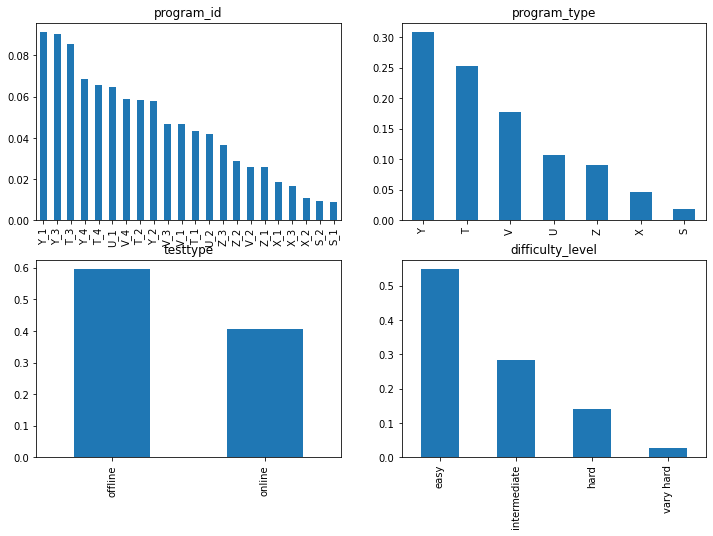

In [28]:
plt.figure(1)

plt.subplot(221)
train['program_id'].value_counts(normalize=True).plot.bar(figsize=(12,8),title='program_id')

plt.subplot(222)
train['program_type'].value_counts(normalize=True).plot.bar(title='program_type')

plt.subplot(223)
train['test_type'].value_counts(normalize=True).plot.bar(title='testtype')

plt.subplot(224)
train['difficulty_level'].value_counts(normalize=True).plot.bar(title='difficulty_level')
plt.show()

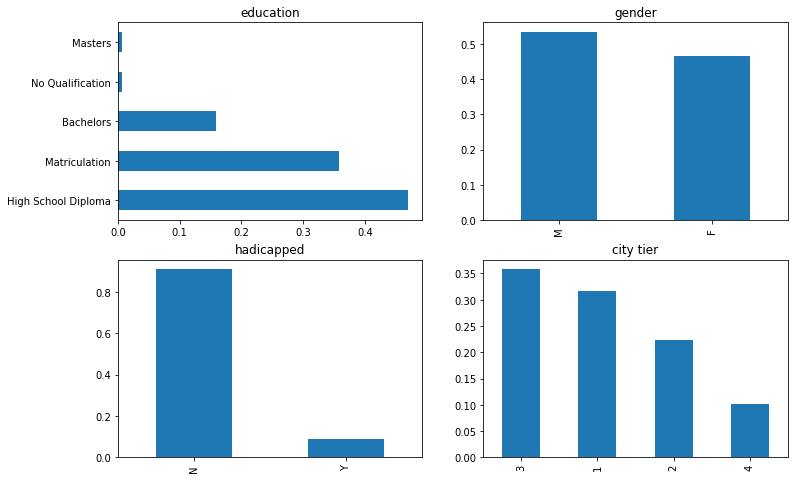

In [29]:
plt.figure(1)

plt.subplot(221)
train['education'].value_counts(normalize=True).plot(figsize=(12,8),title='education',kind='barh')

plt.subplot(222)
train['gender'].value_counts(normalize=True).plot.bar(title='gender')

plt.subplot(223)
train['is_handicapped'].value_counts(normalize=True).plot.bar(title='hadicapped')

plt.subplot(224)
train['city_tier'].value_counts(normalize=True).plot.bar(title='city tier')

Numerical Variable analyis

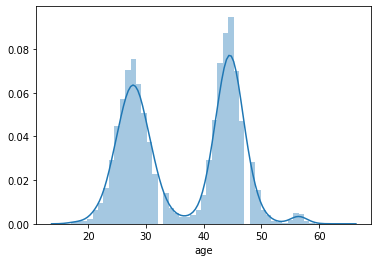

In [30]:
sns.distplot(train['age'].dropna())

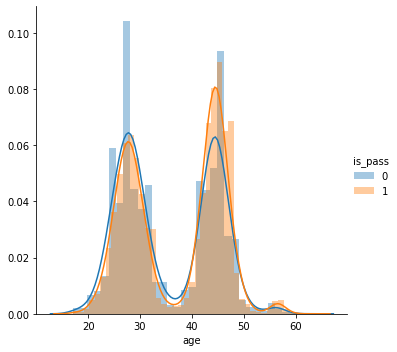

In [31]:
sns.FacetGrid(train,hue='is_pass',size=5).map(sns.distplot,'age').add_legend()

In [32]:
counts,bin_edges=np.histogram(train['age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

ValueError: ignored

In [33]:
print(train['age'].mean())
print(train['age'].median())

36.494033202694965
39.0


In [0]:
train['isna_age']=0
test['isna_age']=0
train.loc[pd.isnull(train['age']),'isna_age']=1
test.loc[pd.isnull(test['age']),'isna_age']=1

In [37]:
train['isna_age'].value_counts()

0    45418
1    27729
Name: isna_age, dtype: int64

In [0]:
train['age']=train['age'].fillna(-999)
test['age']=test['age'].fillna(-999)

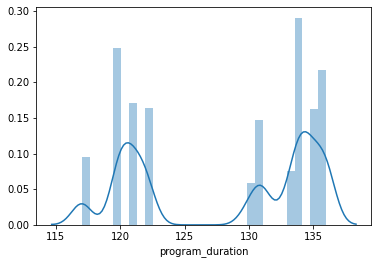

In [39]:
sns.distplot(train['program_duration'])

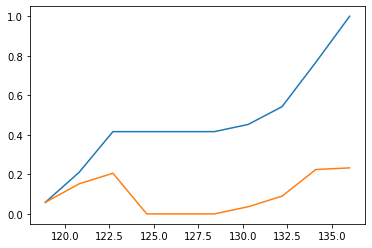

In [40]:
counts,bin_edges=np.histogram(train['program_duration'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],pdf)

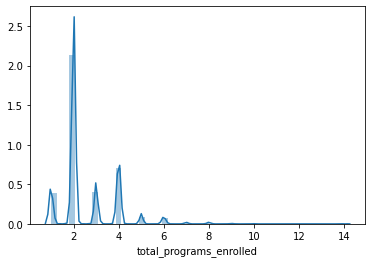

In [41]:
sns.distplot(train['total_programs_enrolled'])

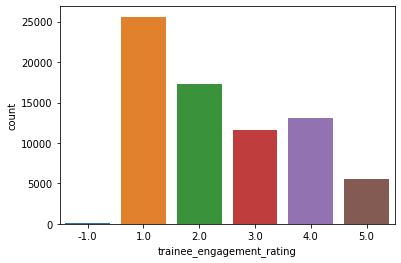

In [42]:
sns.countplot(train['trainee_engagement_rating'].fillna(-1))

In [43]:
pd.crosstab(train['trainee_engagement_rating'].fillna(-1),train['is_pass'])

is_pass,0,1
trainee_engagement_rating,,
-1.0,39,38
1.0,10455,15140
2.0,5426,11808
3.0,3028,8525
4.0,2565,10548
5.0,767,4808


In [0]:
train['trainee_engagement_rating']=train['trainee_engagement_rating'].fillna(1)
test['trainee_engagement_rating']=test['trainee_engagement_rating'].fillna(1)

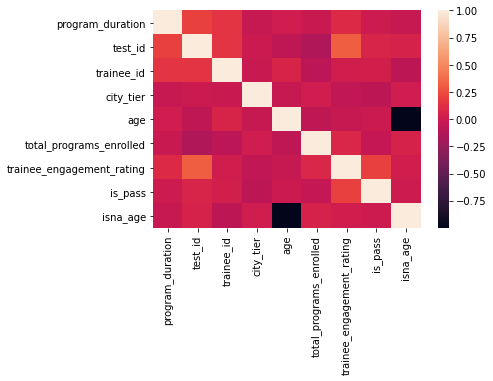

In [45]:
sns.heatmap(train.corr())

In [46]:
train['total_programs_enrolled'].describe()

count    73147.000000
mean         2.583934
std          1.240816
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: total_programs_enrolled, dtype: float64

In [47]:
pd.crosstab(train['total_programs_enrolled'],train['is_pass'])

is_pass,0,1
total_programs_enrolled,,
1,2127,5395
2,12234,28304
3,2342,5310
4,4122,9399
5,634,1071
6,517,941
7,101,185
8,119,181
9,46,33


In [60]:
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass', 'isna_age',
       'trainee_engagement_rating_min_avg_trainee_rating',
       'trainee_engagement_rating_min_avg_diff_trainee_rating'],
      dtype='object')

In [0]:
train['trainee_engagement_rating_min_avg_trainee_rating']=(train['trainee_engagement_rating']-train.groupby(['trainee_id'])['trainee_engagement_rating'].transform('median'))
test['trainee_engagement_rating_min_avg_trainee_rating']=(test['trainee_engagement_rating']-test.groupby(['trainee_id'])['trainee_engagement_rating'].transform('median'))

In [0]:
train['trainee_engagement_rating_min_avg_diff_trainee_rating']=train['trainee_engagement_rating']-train.groupby(['trainee_id','difficulty_level'])['trainee_engagement_rating'].transform('median')
test['trainee_engagement_rating_min_avg_diff_trainee_rating']=test['trainee_engagement_rating']-test.groupby(['trainee_id','difficulty_level'])['trainee_engagement_rating'].transform('median')

In [0]:
train['diff_btw_trainee_test_med']=train['trainee_engagement_rating']-train.groupby(['test_id'])['trainee_engagement_rating'].transform('median')
test['diff_btw_trainee_test_med']=test['trainee_engagement_rating']-test.groupby(['test_id'])['trainee_engagement_rating'].transform('median')

train['diff_btw_trainee_edu_med']=train['trainee_engagement_rating']-train.groupby(['education'])['trainee_engagement_rating'].transform('median')
test['diff_btw_trainee_edu_med']=test['trainee_engagement_rating']-test.groupby(['education'])['trainee_engagement_rating'].transform('median')

train['diff_btw_trainee_diffcult_med']=train['trainee_engagement_rating']-train.groupby(['difficulty_level'])['trainee_engagement_rating'].transform('median')
test['diff_btw_trainee_diffcult_med']=test['trainee_engagement_rating']-test.groupby(['difficulty_level'])['trainee_engagement_rating'].transform('median')

train['diff_btw_trainee_programid_med']=train['trainee_engagement_rating']-train.groupby(['program_id'])['trainee_engagement_rating'].transform('median')
test['diff_btw_trainee_programid_med']=test['trainee_engagement_rating']-test.groupby(['program_id'])['trainee_engagement_rating'].transform('median')

train['diff_btw_trainee_programtype_med']=train['trainee_engagement_rating']-train.groupby(['program_type'])['trainee_engagement_rating'].transform('median')
test['diff_btw_trainee_programtype_med']=test['trainee_engagement_rating']-test.groupby(['program_type'])['trainee_engagement_rating'].transform('median')

train['diff_btw_trainee_citytier_med']=train['trainee_engagement_rating']-train.groupby(['city_tier'])['trainee_engagement_rating'].transform('median')
test['diff_btw_trainee_citytier_med']=test['trainee_engagement_rating']-test.groupby(['city_tier'])['trainee_engagement_rating'].transform('median')

train['diff_btw_trainee_grp_programtype_med']=train['trainee_engagement_rating']-train.groupby(['trainee_id','program_type'])['trainee_engagement_rating'].transform('median')
test['diff_btw_trainee_grp_programtype_med']=test['trainee_engagement_rating']-test.groupby(['trainee_id','program_type'])['trainee_engagement_rating'].transform('median')

In [0]:
train['interaction_div_tpe_ter']=train['total_programs_enrolled']/train['trainee_engagement_rating']
test['interaction_div_tpe_ter']=test['total_programs_enrolled']/test['trainee_engagement_rating']

train['interaction_mul_tpe_ter']=train['total_programs_enrolled']*train['trainee_engagement_rating']
test['interaction_mul_tpe_ter']=test['total_programs_enrolled']*test['trainee_engagement_rating']

train['interaction_div_pd_tpe']=train['program_duration']/train['total_programs_enrolled']
test['interaction_dic_pd_tpe']=test['program_duration']/test['total_programs_enrolled']

train['interaction_mul_pd_tpe']=train['program_duration']*train['total_programs_enrolled']
test['interaction_mul_pd_tpe']=test['program_duration']*test['total_programs_enrolled']

In [0]:
age_bin=[-1000,0,39,100]
age_label=['unknown','adults','seniors']
train['age_group']=pd.cut(train['age'],bins=age_bin,labels=age_label)
test['age_group']=pd.cut(test['age'],bins=age_bin,labels=age_label)

In [62]:
train.select_dtypes(include=object).columns

Index(['id', 'program_id', 'program_type', 'test_type', 'difficulty_level',
       'gender', 'education', 'is_handicapped'],
      dtype='object')

In [0]:
diff={'easy':10,'intermediate':50,'hard':100,'vary hard':150}
train['difficulty_level']=train['difficulty_level'].apply(lambda x: diff[x])
test['difficulty_level']=test['difficulty_level'].apply(lambda x: diff[x])

In [0]:
edu={'Matriculation':5,'High School Diploma':10,'Bachelors':15,'Masters':20,'No Qualification':0}
train['education']=train['education'].apply(lambda x: edu[x])
test['education']=test['education'].apply(lambda x: edu[x])

In [0]:
freq_cat_col=['program_id','program_type','test_id','test_type','gender','is_handicapped','trainee_id','education','difficulty_level']

In [0]:
cat_col=train.select_dtypes(include=object).columns.tolist()

In [68]:
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass', 'isna_age',
       'trainee_engagement_rating_min_avg_trainee_rating',
       'trainee_engagement_rating_min_avg_diff_trainee_rating',
       'diff_btw_trainee_test_med', 'diff_btw_trainee_edu_med',
       'diff_btw_trainee_diffcult_med', 'diff_btw_trainee_programid_med',
       'diff_btw_trainee_programtype_med', 'diff_btw_trainee_citytier_med',
       'diff_btw_trainee_grp_programtype_med', 'interaction_div_tpe_ter',
       'interaction_mul_tpe_ter', 'interaction_div_pd_tpe',
       'interaction_mul_pd_tpe'],
      dtype='object')

In [0]:
df=pd.concat([train,test])

In [0]:
#count encoding
for col in freq_cat_col:
  encoding=df.groupby(col).size()
  train['count_enc_'+col]=train[col].map(encoding)
  test['count_enc_'+col]=test[col].map(encoding)

In [0]:
lb=preprocessing.LabelEncoder()
for col in cat_col:
  lb.fit(df[col])
  train[col]=lb.transform(train[col])
  test[col]=lb.transform(test[col])

In [76]:
train.shape

(73147, 40)

In [0]:
def metrics_(ytrue,ypred):
  auc=metrics.roc_auc_score(ytrue,ypred)
  print('roc_auc_score',auc)

  ypred=[1 if x>=0.5 else 0 for x in ypred]

  accuracy=metrics.accuracy_score(y_true=ytrue,y_pred=ypred)
  print('accuracy:',accuracy)
  precision=metrics.precision_score(y_true=ytrue,y_pred=ypred)
  print('precision:',precision)
  recall=metrics.recall_score(y_true=ytrue,y_pred=ypred)
  print('recall:',recall)
  f1=metrics.f1_score(y_true=ytrue,y_pred=ypred)
  print('f1 score:',f1)
  cm=metrics.confusion_matrix(y_true=ytrue,y_pred=ypred)
  print('confusion metrics:',cm)

In [78]:
metrics_([1,0,0,1,1,0],[0.6,0.3,0.6,0.7,0.9,0.2])

roc_auc_score 0.9444444444444444
accuracy: 0.8333333333333334
precision: 0.75
recall: 1.0
f1 score: 0.8571428571428571
confusion metrics: [[2 1]
 [0 3]]


In [0]:
x=train.drop(['id','is_pass'],axis=1)
y=train['is_pass']
xtest=test.drop(['id'],axis=1)

In [0]:
rf=ensemble.RandomForestClassifier(n_estimators=500)
gbdt=ensemble.GradientBoostingClassifier(n_estimators=1000)
skf=model_selection.StratifiedKFold(n_splits=5)

In [81]:
for i,(tr,ts) in enumerate(skf.split(x,y)):

  print(i+1,'fold')

  xtr,xval=x.iloc[tr],x.iloc[ts]
  ytr,yval=y.iloc[tr],y.iloc[ts]

  rf.fit(xtr,ytr)
  rf_pred=rf.predict_proba(xval)[:,1]
  print('Randforest metrics')
  metrics_(yval,rf_pred)

  gbdt.fit(xtr,ytr)
  gbdt_pred=gbdt.predict_proba(xval)[:,1]
  print('gbdt metrics')
  metrics_(yval,gbdt_pred)

1 fold


ValueError: ignored

In [89]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)

trainee_id                   0.277786
test_id                      0.186390
age                          0.121103
trainee_engagement_rating    0.067146
city_tier                    0.066620
total_programs_enrolled      0.064985
education                    0.044125
program_id                   0.030738
difficulty_level             0.026838
gender                       0.024951
program_duration             0.020680
test_type                    0.020293
is_handicapped               0.017184
isna_age                     0.016526
program_type                 0.014636
dtype: float64

In [90]:
pd.Series(gbdt.feature_importances_,index=x.columns).sort_values(ascending=False)

test_id                      0.264467
trainee_engagement_rating    0.199568
trainee_id                   0.173469
test_type                    0.106051
difficulty_level             0.055335
program_id                   0.052110
education                    0.044504
age                          0.028593
city_tier                    0.024780
total_programs_enrolled      0.018724
program_duration             0.010840
program_type                 0.008407
is_handicapped               0.007867
gender                       0.004489
isna_age                     0.000796
dtype: float64

In [0]:
xtrain=train.drop(['id','is_pass'],axis=1)
ytrain=train['is_pass']
xtest=train.drop(['id'],axis=1)